In [1]:
from tensorflow.keras import models, layers
from ngdlm import models as ngdlmodels
from ngdlm import utils as ngdlutils
from tensorflow.keras.datasets import mnist
import numpy as np

# Train- and test-data.

In [2]:
(x_input_train, _), (x_input_test, y_output_test) = mnist.load_data()
x_input_train = x_input_train.astype("float32") / 255.0
x_input_test = x_input_test.astype("float32") / 255.0
print(x_input_train.shape)
print(x_input_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Variational autoencoder.

In [3]:
latent_dim = 2

# Create the encoder.
encoder_input = layers.Input(shape=(28, 28))
encoder_output = layers.Reshape((28 * 28,))(encoder_input)
encoder_output = layers.Dense(512, activation="relu")(encoder_output)
encoder = models.Model(encoder_input, encoder_output)

# Create the decoder.
decoder_input = layers.Input(shape=(latent_dim,))
decoder_output = layers.Dense(512, activation="relu")(decoder_input)
decoder_output = layers.Dense(28 * 28, activation="sigmoid")(decoder_output)
decoder_output = layers.Reshape((28, 28))(decoder_output)
decoder = models.Model(decoder_input, decoder_output)

# Create the autoencoder.
vae = ngdlmodels.VAE(encoder, decoder, latent_dim=latent_dim)
vae.compile(optimizer="adam", loss="binary_crossentropy")
vae.summary()

# Train.
print("Train...")
history = vae.fit(
        x_input_train, x_input_train,
        epochs=100,
        batch_size=32,
        shuffle=True,
        validation_data=(x_input_test, x_input_test)
    )
    
# Evaluate.
print("Evaluate...")
loss = vae.evaluate(x_input_test, x_input_test)
print("Loss:", loss)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Encoder:
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 512)          401920      reshape[0][0]                    
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026       

60000/60000 [==============================] - 10s 160us/sample - loss: 0.1868 - val_loss: 0.1905
Epoch 37/100
60000/60000 [==============================] - 11s 186us/sample - loss: 0.1867 - val_loss: 0.1904
Epoch 38/100
60000/60000 [==============================] - 10s 159us/sample - loss: 0.1866 - val_loss: 0.1904
Epoch 39/100
60000/60000 [==============================] - 10s 158us/sample - loss: 0.1865 - val_loss: 0.1906
Epoch 40/100
60000/60000 [==============================] - 10s 169us/sample - loss: 0.1863 - val_loss: 0.1903
Epoch 41/100
60000/60000 [==============================] - 12s 197us/sample - loss: 0.1862 - val_loss: 0.1906
Epoch 42/100
60000/60000 [==============================] - 10s 167us/sample - loss: 0.1861 - val_loss: 0.1905
Epoch 43/100
60000/60000 [==============================] - 9s 157us/sample - loss: 0.1860 - val_loss: 0.1905
Epoch 44/100
60000/60000 [==============================] - 10s 165us/sample - loss: 0.1859 - val_loss: 0.1904
Epoch 45/100
60

# Visualizing variational autoencoder.

Rendering history...


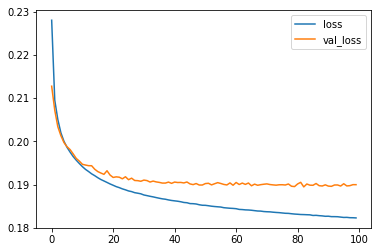

Rendering reconstructions...


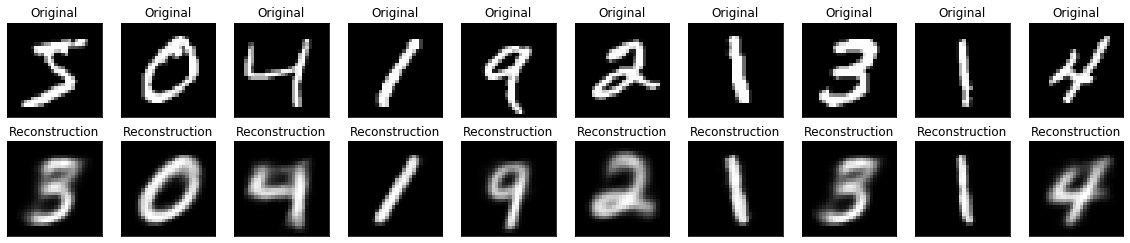

Rendering latent-space...


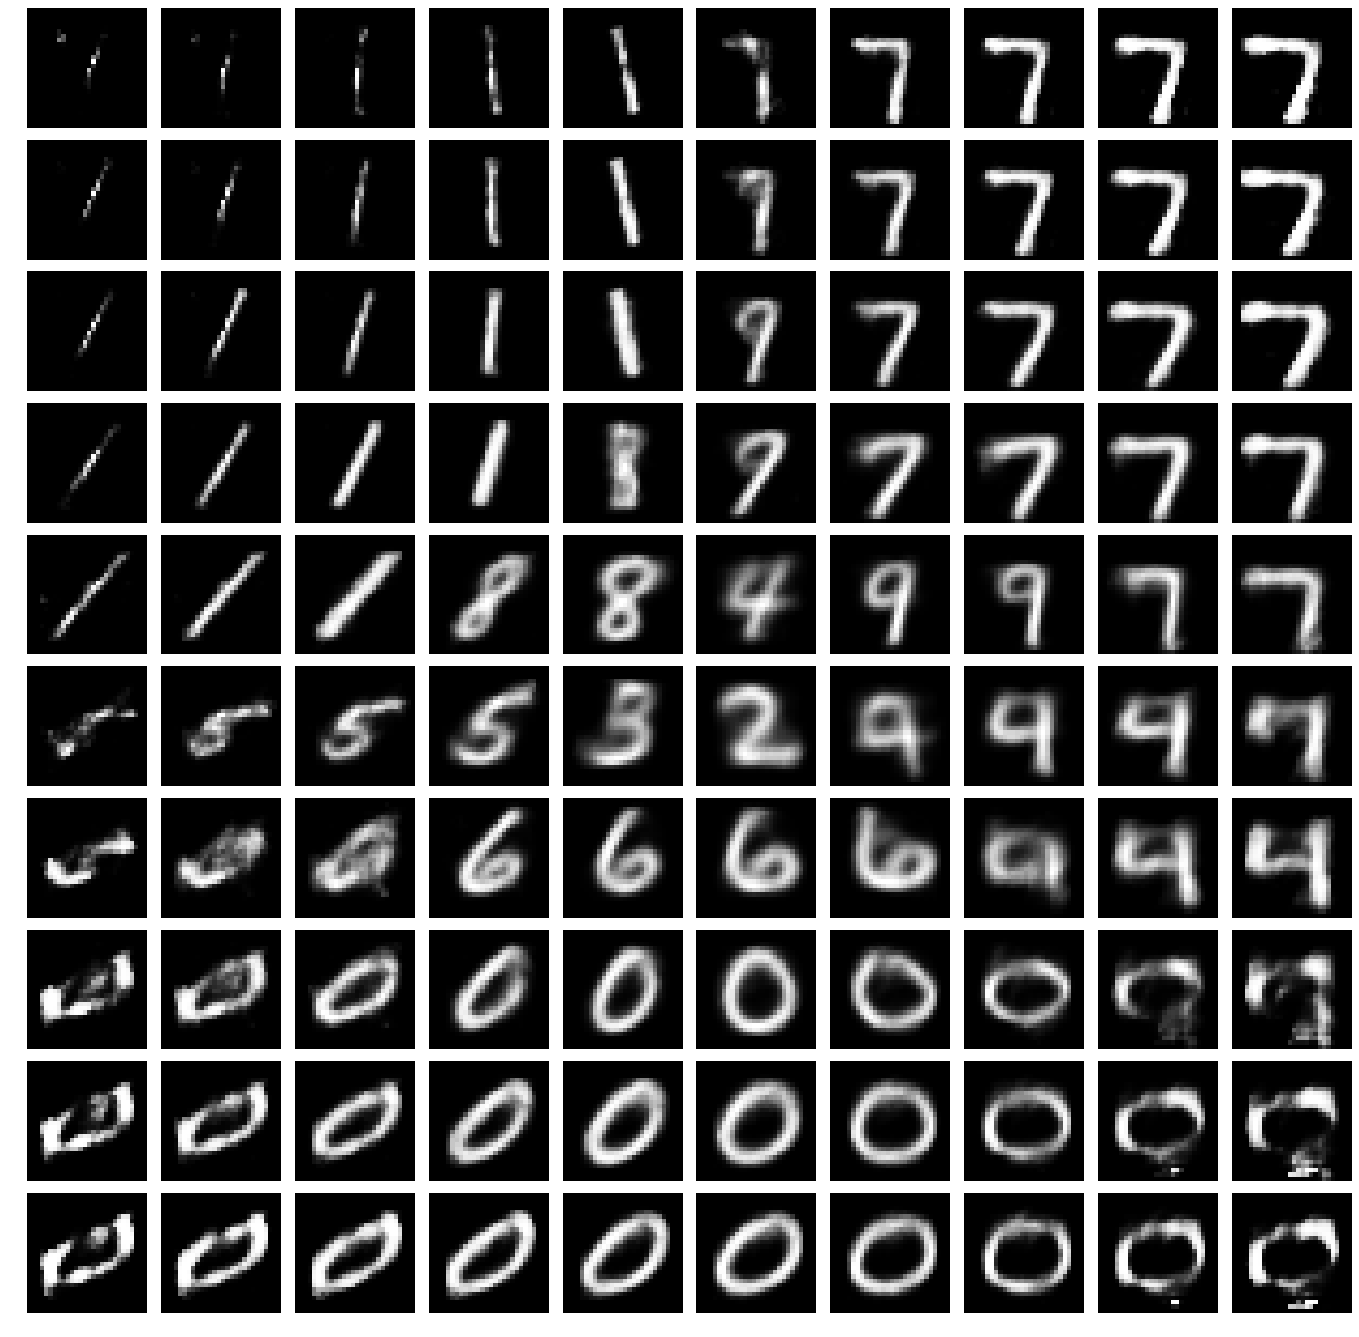

Rendering encodings...


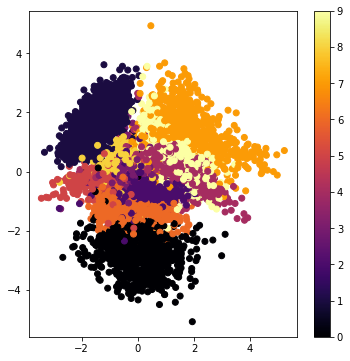

In [4]:
print("Rendering history...")
ngdlutils.render_history(history)

print("Rendering reconstructions...")
ngdlutils.render_image_reconstructions(vae, x_input_train[0:10])

print("Rendering latent-space...")
ngdlutils.render_image_latent_space(vae.decoder, 10)

print("Rendering encodings...")
ngdlutils.render_encodings(vae.encoder, x_input_test, y_output_test)